In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [70]:
# Load the Netflix dataset
data = pd.read_csv('/content/netflix_movies.csv')
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [68]:
# Function for descriptive statistics
def descriptive_statistics(df):
    """
    Shows basic statistics for numerical columns.
    """
    print(df.describe())

In [69]:
# Display descriptive statistics
print("Descriptive Statistics:\n")
descriptive_statistics(data)

Descriptive Statistics:

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [20]:
# Function for showing distribution of show types
def plot_show_type_distribution(df):
    """
    Plots the count of Movies vs. TV Shows.
    """
    df['type'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Count of Show Types")
    plt.xlabel("Type of Show")
    plt.ylabel("Count")
    plt.show()


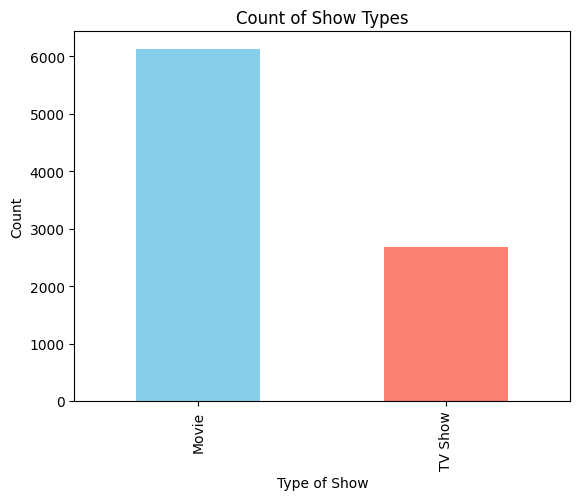

In [21]:
# Plot distribution of show types
plot_show_type_distribution(data)

In [24]:
# Function to show release trends over time
def plot_release_trends(df):
    """
    Plots how many titles were released each year.
    """
    releases_per_year = df['release_year'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(releases_per_year.index, releases_per_year.values, marker="o")
    plt.title("Titles Released Each Year")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.show()

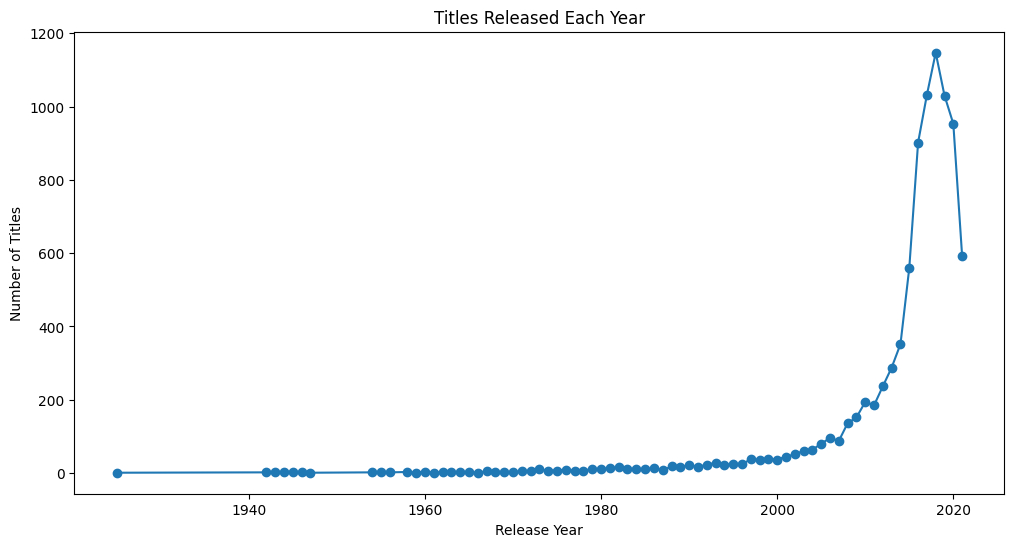

In [25]:
# Plot release trends over time
plot_release_trends(data)

In [106]:
# Function for content rating distribution
def plot_rating_distribution(df):
    """
    Plots a pie chart of content ratings.
    """
    ratings_counts = df['rating'].value_counts()

    top_ratings = ratings_counts.head(8)
    other_ratings_count = ratings_counts.iloc[8:].sum()

    labels = list(top_ratings.index) + ['Other']
    sizes = list(top_ratings.values) + [other_ratings_count]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Content Rating Distribution")
    plt.show()

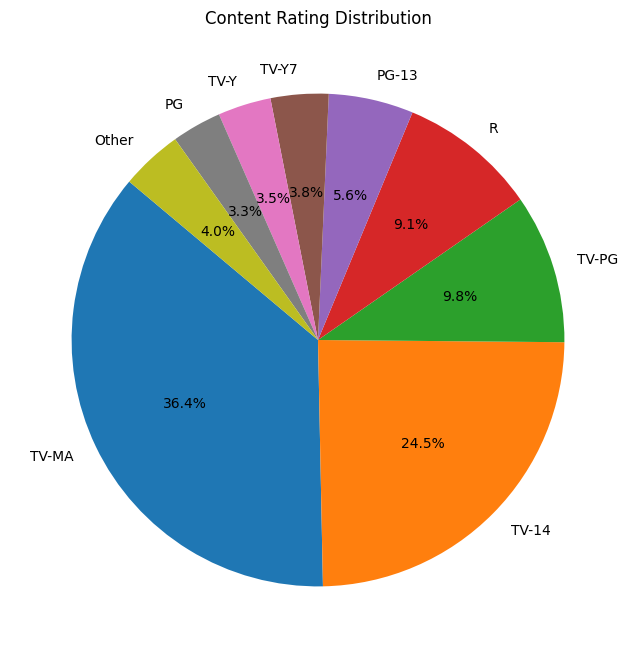

In [107]:
# Plot improved content rating distribution
plot_rating_distribution(data)

In [63]:
# Function to create a violin plot
def plot_violin_plot(df, x_column, y_column):
    """
    This function creates a violin plot to show how the data in one column
    is distributed based on the values in another column.
    """

    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x=x_column, y=y_column, hue=x_column, palette="pastel")
    plt.title(f"Violin Plot of {y_column} by {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

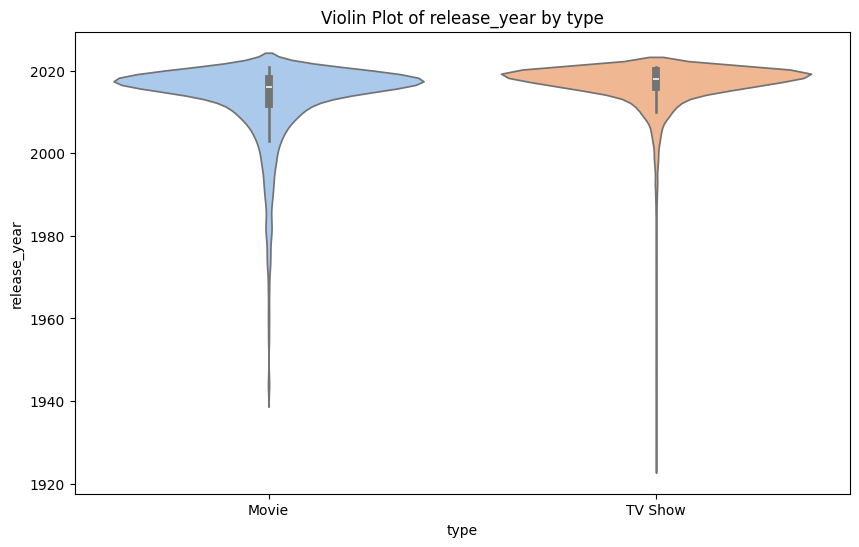

In [64]:
# Plot Violin Plot for 'release_year' by 'type'
plot_violin_plot(data, 'type', 'release_year')

In [108]:
# Function for calculating and printing basic statistics for a column
def basic_stats(df, column):
    """
    Prints mean, median, and standard deviation for a specific column.
    """
    mean_val = df[column].mean()
    median_val = df[column].median()
    std_dev = df[column].std()
    skewness_val = skew(df[column].dropna())
    kurtosis_val = kurtosis(df[column].dropna())

    print(f"Basic Statistics for {column}:\n")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness_val}")
    print(f"Kurtosis: {kurtosis_val}")

In [109]:
# Example: Calculate basic statistics for 'release_year'
basic_stats(data, 'release_year')

Basic Statistics for release_year:

Mean: 2014.1801975701146
Median: 2017.0
Standard Deviation: 8.819312130834057
Skewness: -3.4459779968241837
Kurtosis: 16.22233038937831
